In [44]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [36]:
# Import CSV file into a Pandas DataFrame
store_data = pd.read_csv('Data/WMdata_with_holidays copy.csv')

# Review the DataFrame
store_data.head(30)

,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Name
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Valentine's Day
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,NaN
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,NaN
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,NaN
5,5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,NaN
6,6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,NaN
7,7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,NaN
8,8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,Easter
9,9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,NaN


In [3]:
# Check for duplicates
duplicates = store_data[store_data.duplicated()]
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found")

# Check for missing values
missing_values = store_data.isnull().sum()
if missing_values.any():
    print("\nMissing values found:")
    print(missing_values)
else:
    print("\nNo missing values found")

No duplicate rows found

Missing values found:
Unnamed: 0         0
Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Holiday_Name    5535
dtype: int64


In [4]:
#Fill NaN values and drop 'Unnamed:0' column
store_data.fillna(0, inplace=True)
store_data.drop(columns = ['Unnamed: 0'], inplace=True)
store_data.head(30)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Valentine's Day
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,0
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,0
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,0
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,Easter
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,0


In [5]:
# List of holidays as observed by Walmart
holidays = [
    ["2010-02-05", "Super Bowl"],
    ["2010-02-12", "Valentine's Day"],
    ["2010-04-02", "Easter"],
    ["2010-07-02", "Independence Day"],
    ["2010-09-10", "Labor Day"],
    ["2010-10-29", "Halloween"],
    ["2010-11-26", "Thanksgiving Day"],
    ["2010-12-24", "Christmas Day"],
    ["2011-12-31", "New Year's Day"],
    ["2011-02-04", "Super Bowl"],
    ["2011-02-11", "Valentine's Day"],
    ["2011-04-22", "Easter"],
    ["2011-07-01", "Independence Day"],
    ["2011-09-09", "Labor Day"],
    ["2011-10-28", "Halloween"],
    ["2011-11-25", "Thanksgiving Day"],
    ["2011-12-23", "Christmas Day"],
    ["2012-12-30", "New Year's Day"],
    ["2012-02-03", "Super Bowl"],
    ["2012-02-17", "Valentine's Day"],
    ["2012-04-06", "Easter"],
    ["2012-07-06", "Independence Day"],
    ["2012-09-07", "Labor Day"]
]

In [6]:
def clean_and_convert_date(df, date_column_name):
    #Convert the date column to datetime
    df[date_column_name] = pd.to_datetime(df[date_column_name], format='%Y-%m-%d', errors='coerce')
    
    return df

store_data = clean_and_convert_date(store_data, 'Date')

In [7]:
# Check Date datatype
print(store_data['Date'].dtype)

datetime64[ns]


In [8]:
# Initialize 'Holiday_Name' column 
store_data['Holiday_Name'] = None

In [9]:
# Function to get Holiday_Name
def get_holiday_name(date):
    for holiday_date, holiday_name in holidays:
        if date == pd.to_datetime(holiday_date, format='%Y-%m-%d').date():
            return holiday_name
    return None

In [10]:
# Function to populate Holiday_Name and resulting Holiday_Flag
store_data['Holiday_Name'] = store_data['Date'].apply(get_holiday_name)
store_data['Holiday_Flag'] = store_data['Holiday_Name'].apply(lambda x: 1 if x is not None else 0)

/var/folders/vq/0fk27r_d7fvdfvmppyp7ky6r0000gn/T/ipykernel_39166/222472186.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date == pd.to_datetime(holiday_date, format='%Y-%m-%d').date():


In [11]:
store_data.head(30)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Name
0,1,2010-02-05,1643690.90,1,42.31,2.572,211.096358,8.106,Super Bowl
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Valentine's Day
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,None
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,None
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,None
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,None
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,None
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,None
8,1,2010-04-02,1594968.28,1,62.27,2.719,210.820450,7.808,Easter
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,None


In [12]:
# Save cleaned df to CSV
store_data.to_csv('Data/WalmartCleaned.csv')

In [13]:
##EXPLORE DATA##

In [38]:
# Split date column into day, month, year
store_data["Day"]=pd.DatetimeIndex(store_data['Date']).day
store_data["Month"]=pd.DatetimeIndex(store_data['Date']).month
store_data["Year"]=pd.DatetimeIndex(store_data['Date']).year
store_data

,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Name,Day,Month,Year
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,5,2,2010
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Valentine's Day,12,2,2010
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,19,2,2010
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,26,2,2010
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,NaN,28,9,2012
6431,6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,NaN,5,10,2012
6432,6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,NaN,12,10,2012
6433,6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,NaN,19,10,2012


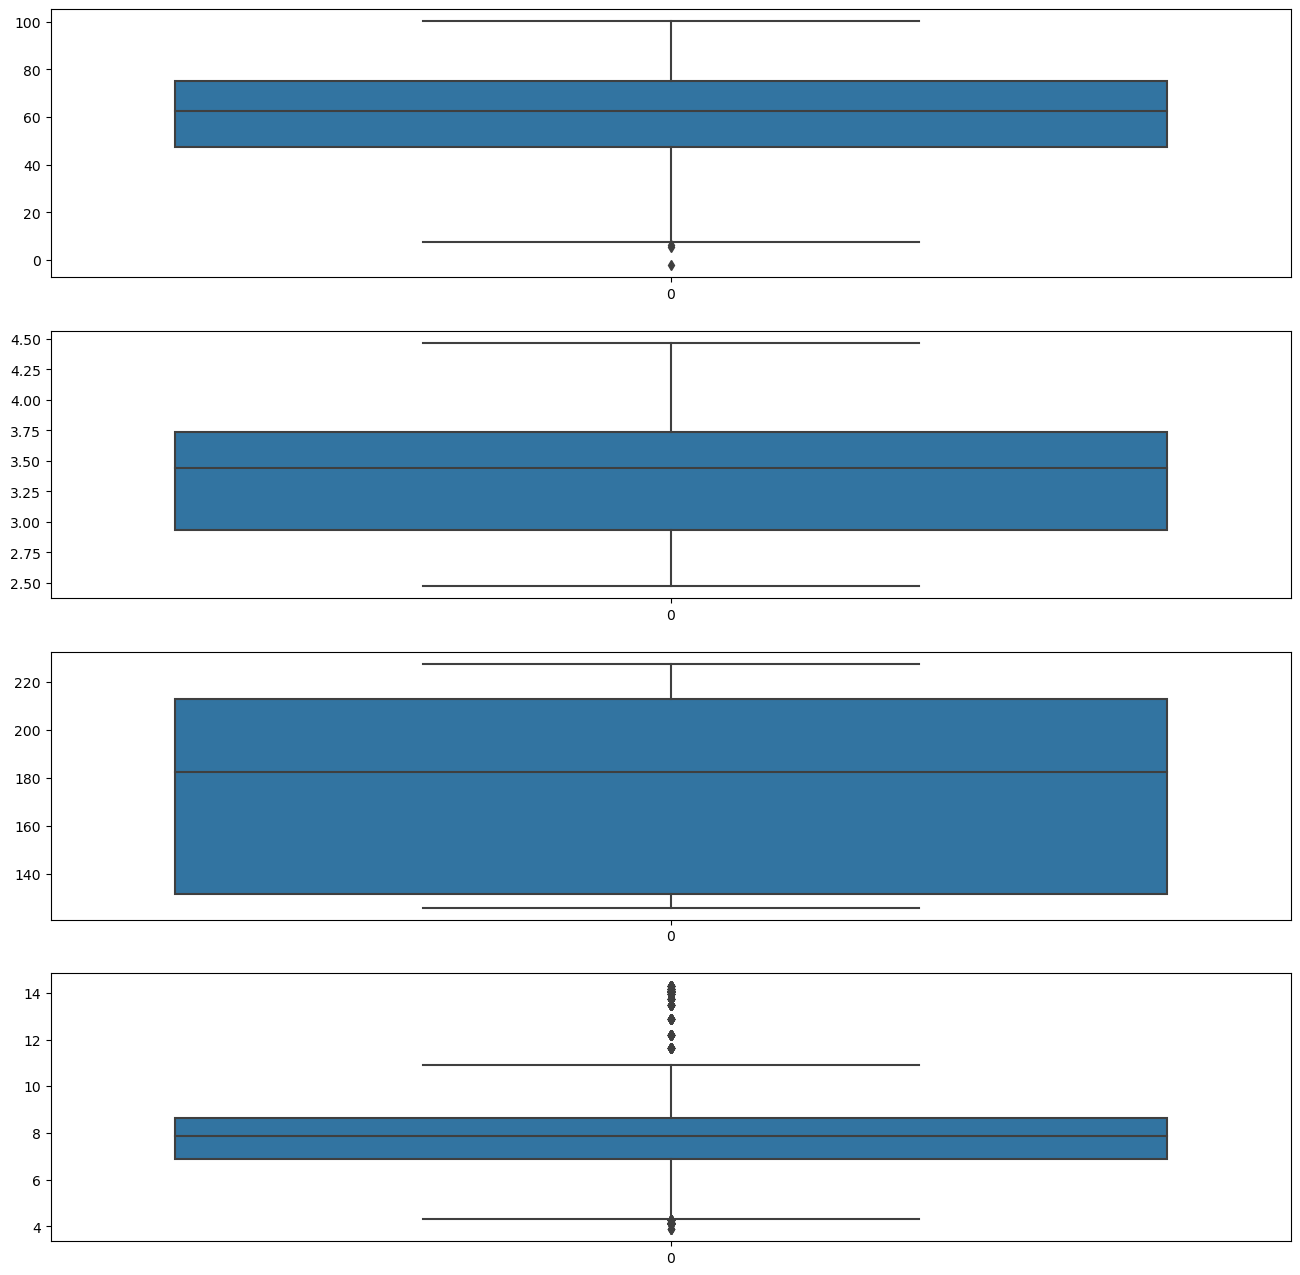

In [41]:
#Detecting outliers with boxplot :
fig, axis = plt.subplots(4,figsize=(16,16))
X = store_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(store_data[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Remove outliers     
store_data_clean = store_data[(store_data['Unemployment']<10) & (store_data['Unemployment']>4.5) & (store_data['Temperature']>10)]
store_data_clean

,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Name,Day,Month,Year
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,5,2,2010
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Valentine's Day,12,2,2010
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,19,2,2010
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,26,2,2010
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,NaN,28,9,2012
6431,6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,NaN,5,10,2012
6432,6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,NaN,12,10,2012
6433,6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,NaN,19,10,2012


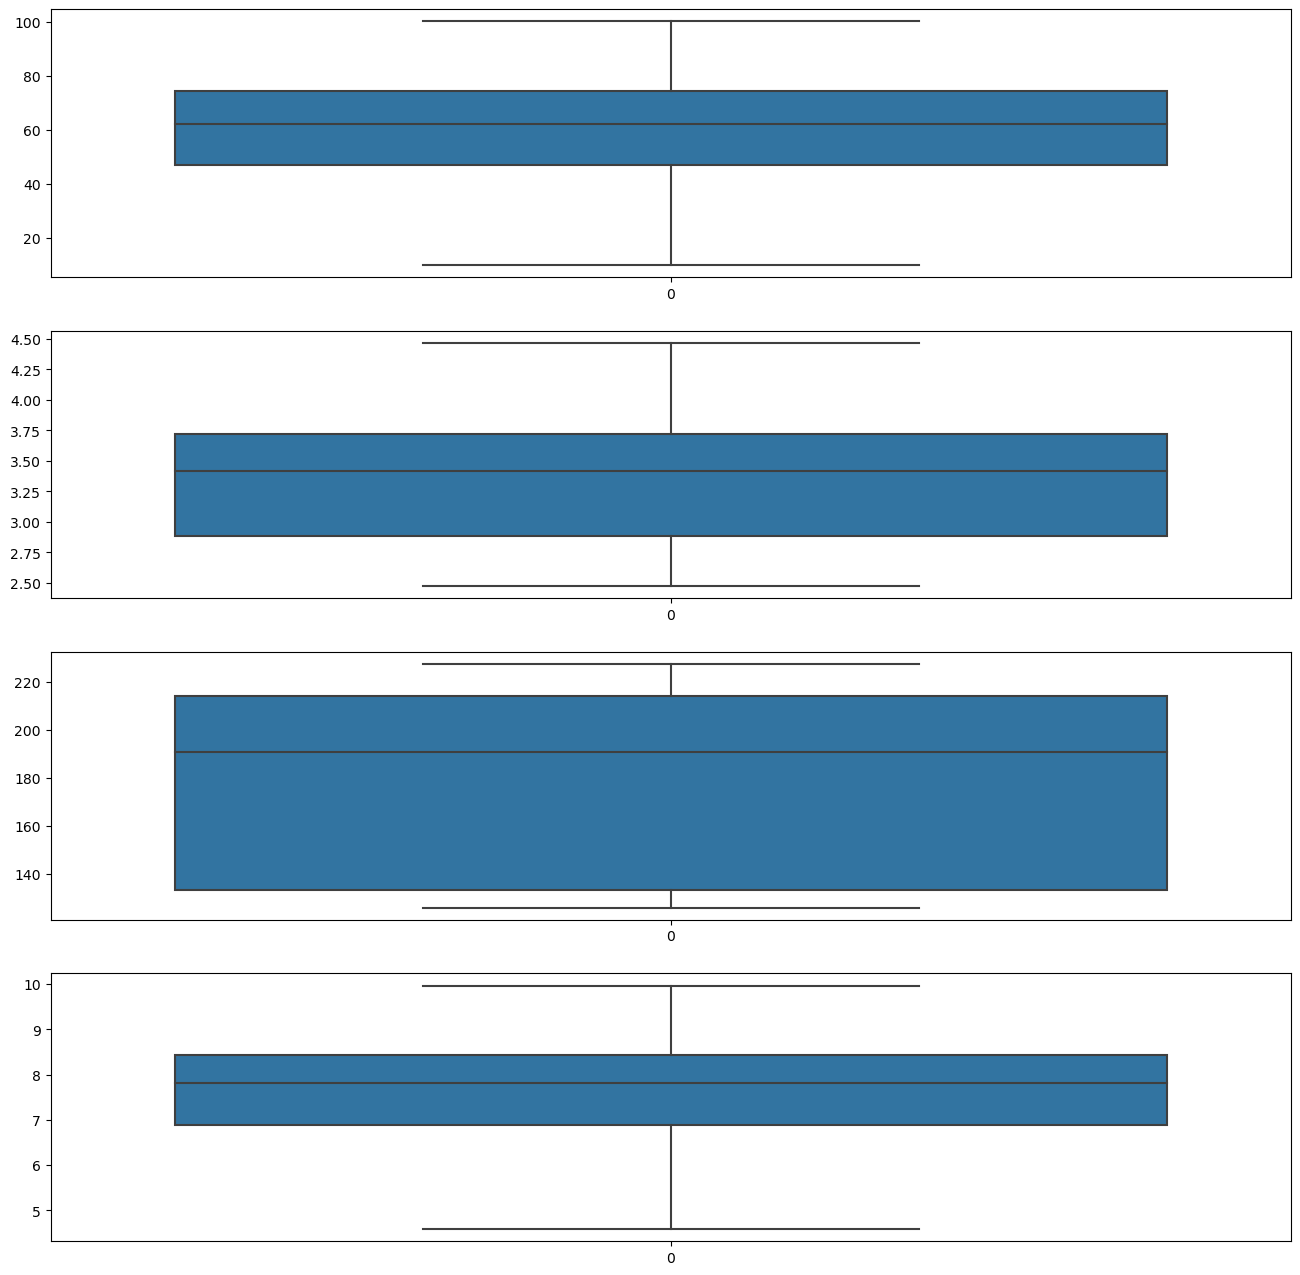

In [43]:
#Checking if outliers were removed
fig, axis = plt.subplots(4,figsize=(16,16))
X = store_data_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(store_data_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Seperate the features, X, from the target variable, y
y = store_data_clean['Weekly_Sales']
X = store_data_clean[['Fuel_Price','CPI','Unemployment','Day','Month','Year']]

In [46]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict target variable and evaluate the model
y_pred=model.predict(X_test)

print('Accuracy:',model.score(X_train,y_train)*100)
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Accuracy: 1.6715773442841808
Mean Squared Error: 324859829451.76544
Root Mean Squared Error: 569964.7615877367
Mean Absolute Error: 482253.5476871113


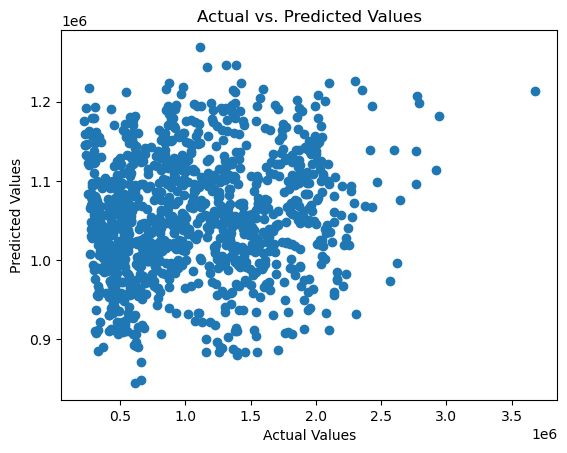

In [49]:
# Visualize the model's prediction
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()